# Chap 4 matplotlib 활용하여 그래프 그리기
1. 선그래프

In [2]:
import pandas as pd
import matplotlib.pyplot as plt # 그래프 모듈

In [ ]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx', header=0)
df.head()

In [ ]:
# Nan을 이전 값으로 대체 : df.fillna(methode='ffill')
df = df.fillna(method='ffill')
df.head(3)
# df.tail(3)

# 전출지가 '서울특별시' 다른 도시로 이전한 인구수의 분포를 분석
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
# df_seoul = df[df['전출치별'] == '서울특별시' & df['전입지별' != '서울특별시']]
# mask[10:40]

df_seoul = df[mask]
df_seoul

# 전추리별의 값은 모두 '서울특별시' 이기때문에 칼럼 삭제

df_seoul = df_seoul.drop('전출지별',axis = 1)
df_seoul

# 전입지 별 컬럼명을 전입지로 변경

df_seoul.rename({'전입지별':'전입지'},axis = 1, inplace=True)
df_seoul

# '전입지' 칼럼을 인덱스로 설정

df_seoul.set_index('전입지',inplace=True)

In [ ]:
# df_seoul에서 전입지가 '경기도'인 자료만 추출
sr_one = df_seoul.loc['경기도']
sr_one

# 기본 선 그래프로 그리기

plt.plot(sr_one)

plt.plot(sr_one.index, sr_one.values)

In [10]:
# matplotlib 한글 폰트 문제 해결
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

NameError: name 'sr_one' is not defined

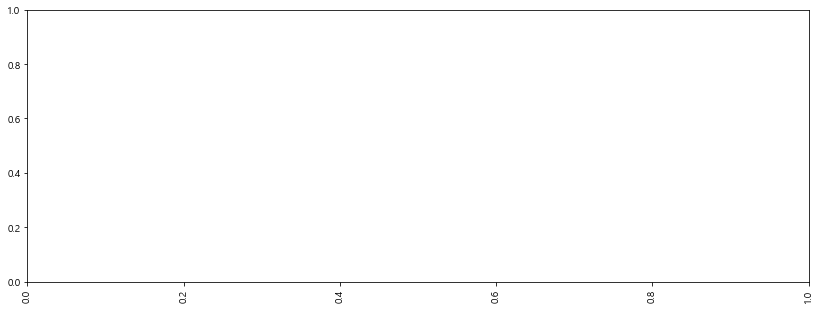

In [11]:
plt.figure(figsize=(14,5)) # 그래프 사이즈 지정

# x축 눈금 라벨 회전 : plt.xticks(rotation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.plot(sr_one)

In [ ]:
# 그래프에 제목 추가, 축 이름 추가
# 서울 - 경기도 이동 인구
# x축 이름 -> 기간 , y축 이름 -> '이동 인구 수'

plt.xticks(rotation = 75) # rotation = 숫자는 회전 각도를 의미
plt.plot(sr_one)

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.legend(labels=['서울 -> 경기'], loc ='best')

plt.show()



In [ ]:

plt.xticks(rotation = 75) # rotation = 숫자는 회전 각도를 의미
plt.plot(sr_one, marker='o', markersize = 5, color='skyblue',
        mfc='red')

plt.title('서울 -> 경기도 이동 인구', size=20)
plt.xlabel('기간')
plt.ylabel('이동 인구 수',size = 14)
plt.legend(labels=['서울 -> 경기'], loc ='best')

plt.show()

In [ ]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정
plt.xticks(size=10, rotation=75)  #  rotation = 숫자는 회전 각도를 의미
plt.plot(sr_one, marker='o', markersize=5, color='skyblue',
         mfc='red')

plt.title('서울 -> 경기도 이동 인구', size=20)
plt.xlabel('기간')
plt.ylabel('이동 인구 수', size=14)
plt.legend(labels=['서울 -> 경기'], loc='best')

# 설명 추가 
# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 : 화살표 정의
plt.annotate('',
             xy = (20, 620000),   # 화살표의 머리 부분(끝점)
             xytext = (2,290000), # 화살표의 꼬리 부분 (시작점)
             arrowprops = dict(arrowstyle='->', color='skyblue', lw=5) # 화살표
            )
plt.annotate('',
             xy = (47, 450000),   # 화살표의 머리 부분(끝점)
             xytext = (30,580000), # 화살표의 꼬리 부분 (시작점)
             arrowprops = dict(arrowstyle='->', color='olive', lw=5) # 화살표
            )

# 주석 표시 : 문장
plt.annotate("인구 이동 증가(1970-1995)",
             xy = (10,450000),
             rotation=25,
             va='baseline' ,
             ha='center',
             fontsize=10
            )
plt.annotate("인구 이동 감소(1995- 2017)",
             xy = (40,500000),
             rotation=-10,
             va='baseline' ,
             ha='center',
             fontsize=10
            )


plt.show()

In [ ]:
# 한 화면에 두개의 그래프 그리기 : add_subplot()

fig = plt.figure(figsize= (14,10))

ax1 = fig.add_subplot(2, 1, 1) # 1행에 2개, 1열에 1개, 위치
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 그리기
ax1.plot(sr_one, marker='o')
ax2.plot(sr_one)
ax2.plot(sr_one, label='서울->경기')
ax2.legend(loc='best')

ax1.set_title('서울->경기 이동 연구')
ax1.set_xtickslabels(sr_one.index, rotation=50)
ax2.set_xtickslabels(sr_one.index, rotation=50)
plt.show()

In [ ]:
col_years = list( map(str,range(1970, 2018))) #년도를 1970~2017까지
col_years

df_1 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]
df_1

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

# axe에 그래프 추가

ax.plot(col_years,df_1.loc['충청남도',:],color='red',
        marker='o',label='서울->충남')
ax.plot(col_years,df_1.loc['경상북도',:],color='blue',
        marker='o',label='서울->경북')
ax.plot(col_years,df_1.loc['강원도',:],color='green',
        marker='o',label='서울->강원')

ax.legend(loc='best')

# x label 추가

ax.set_xlabel('기간',size = 12)
ax.set_ylabel('이동인구수',size=12)

plt.show()

In [ ]:
# df 2 ->서울에서 충남, 경북, 강원도, 전남으로 이동한 자료 추출
#        1980년도에서 2016년도 까지의 자료

In [ ]:
col_years2 = list( map(str,range(1980, 2016))) #저장된 자료가 str이기에
col_years2                                     #int로 변경

df_2 = df_seoul.loc[ [ '충청남도','경상북도','강원도','전라남도'], col_years2]
df_2

In [ ]:
fig = plt.figure(figsize=(15,5))

#그래프 지정
ax1 = fig.add_subplot(2, 2, 1) #충남
ax2 = fig.add_subplot(2, 2, 2) #경북
ax3 = fig.add_subplot(2, 2, 3) #강원
ax4 = fig.add_subplot(2, 2, 4) #전남

#각 그래프 객체에 그래프 출력
ax1.plot(col_years2,df_2.loc['충청남도',:],color='red',
        marker='o',label='서울->충남')
ax2.plot(col_years2,df_2.loc['경상북도',:],color='blue',
        marker='o',label='서울->경북')
ax3.plot(col_years2,df_2.loc['강원도',:],color='green',
        marker='o',label='서울->강원')
ax4.plot(col_years2,df_2.loc['전라남도',:],color='orange',
        marker='o',label='서울->전남')
#범례표시
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

#각 그래프의 제목 추가
ax1.set_title('서울 -> 충남 인구 이동',size=12)
ax1.set_ylabel('이동인구수',size=12)
ax2.set_title('서울 -> 경북 인구 이동',size=12)
ax2.set_ylabel('이동인구수',size=12)
ax3.set_title('서울 -> 강원 인구 이동',size=12)
ax3.set_ylabel('이동인구수',size=12)
ax4.set_title('서울 -> 전남 인구 이동',size=12)
ax4.set_ylabel('이동인구수',size=12)

#각 그래프의 xticks 지정
ax1.set_xticks(ticks= col_years2, rotation=75)
ax2.set_xticks(ticks= col_years2, rotation=75)
ax3.set_xticks(ticks= col_years2, rotation=75)
ax4.set_xticks(ticks= col_years2, rotation=75)
plt.show()

In [3]:
# twin 그래프 >> x축 동일 ,y축 범위 서로다름
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')
df


#북한의 수력,화력 발전량의 추이를 분석

df = df.loc[5:]
df # 전력량(컬럼) 제거
df = df.drop('전력량 (억㎾h)', axis = 1)
df
# 발전전력별 칼럼을 index로

df.set_index('발전 전력별',inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
df_t = df.T
df_t

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [5]:
# 합계 -> 총 발전량
df_t = df_t.rename(columns={'합계':'총발전량'})
df_t

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [ ]:
# 증감율 : ((총발전량 / (총발전량 - 전년도 총 발전량) - 1)* 100
# ['총발전량 - 1년']

In [6]:
print(df_t['총발전량'])
print()
print(df_t['총발전량'], df_t['총발전량'].shift(1))

1990    277
1991    263
1992    247
1993    221
1994    231
1995    230
1996    213
1997    193
1998    170
1999    186
2000    194
2001    202
2002    190
2003    196
2004    206
2005    215
2006    225
2007    236
2008    255
2009    235
2010    237
2011    211
2012    215
2013    221
2014    216
2015    190
2016    239
Name: 총발전량, dtype: object

1990    277
1991    263
1992    247
1993    221
1994    231
1995    230
1996    213
1997    193
1998    170
1999    186
2000    194
2001    202
2002    190
2003    196
2004    206
2005    215
2006    225
2007    236
2008    255
2009    235
2010    237
2011    211
2012    215
2013    221
2014    216
2015    190
2016    239
Name: 총발전량, dtype: object 1990    NaN
1991    277
1992    263
1993    247
1994    221
1995    231
1996    230
1997    213
1998    193
1999    170
2000    186
2001    194
2002    202
2003    190
2004    196
2005    206
2006    215
2007    225
2008    236
2009    255
2010    235
2011    237
2012    211
2013    215
2014    221

In [62]:
df_t['전년도발전량'] = df_t['총발전량'].shift(1)
df_t

증감률 ->(총발전량/전년도발전량-1)*100
df_t['증감률'] = (df_t['총발전량']/df_t['전년도발전량']-1)*100
df_t

발전 전력별,총발전량,수력,화력,원자력,전년도발전량,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


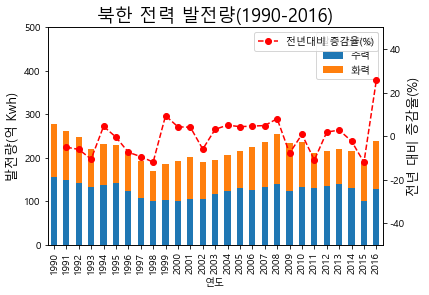

In [37]:
# 2개축 그래프 그리기 :수력,화력 -> 막대 그래프
#                     : 증감률 -> 선 그래프

ax1 = df_t[['수력','화력']].plot(kind='bar',stacked=True)
ax2 = ax1.twinx() # 2개의 y축의 값의 범위가 다른 경우
ax2.plot(df_t.index,df_t.증감률, ls='--',
         marker='o',label='전년대비 증감율(%)',color='red')

ax1.set_ylim(0,500)      # ctrl + shift + -(minus) <셀 분리>
ax2.set_ylim(-50,50)     # esc(명령어입령상태) shift + m <셀 병합>

ax1.set_xlabel("연도")
ax1.set_ylabel("발전량(억 Kwh)",size=13)
ax2.set_ylabel("전년 대비 증감율(%)",size=13)

plt.title("북한 전력 발전량(1990-2016)",size=18)
plt.legend(loc='best')

plt.show()


In [110]:
df_k = pd.read_excel('./dataset/남북한발전전력량.xlsx')
df_k

df_k = df_k.loc[0:4]
df_k


df_k = df_k.drop('전력량 (억㎾h)', axis = 1)
df_k

df_k.set_index('발전 전력별',inplace=True)
df_k

df_k_t = df_k.T
df_K = df_k.T
df_K

df_K = df_K.rename(columns={'합계':'총발전량'})
df_K['전년도발전량'] = df_K['총발전량'].shift(1)

df_K['증감률'] = (df_K['총발전량']/df_K['전년도발전량']-1)*100
df_K

발전 전력별,총발전량,수력,화력,원자력,신재생,전년도발전량,증감률
1990,1077,64,484,529,-,NaN,NaN
1991,1186,51,573,563,-,1077,10.120706
1992,1310,49,696,565,-,1186,10.455312
1993,1444,60,803,581,-,1310,10.229008
1994,1650,41,1022,587,-,1444,14.265928
1995,1847,55,1122,670,-,1650,11.939394
1996,2055,52,1264,739,-,1847,11.261505
1997,2244,54,1420,771,-,2055,9.19708
1998,2153,61,1195,897,-,2244,-4.055258
1999,2393,61,1302,1031,-,2153,11.147236


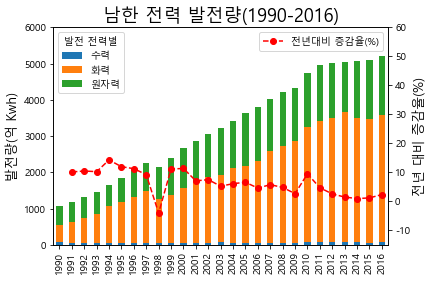

In [102]:
axk1 = df_K[['수력','화력','원자력',]].plot(kind='bar',stacked=True)
axk2 = axk1.twinx()
axk2.plot(df_K.index,df_K.증감률, ls='--',
         marker='o',label='전년대비 증감율(%)',color='red')
axk1.set_ylim(0,6000)
axk2.set_ylim(-15,60)

axk1.set_label('연도')
axk1.set_ylabel("발전량(억 Kwh)",size=13)
axk2.set_ylabel("전년 대비 증감율(%)",size=13)

plt.title("남한 전력 발전량(1990-2016)",size=18)
plt.legend(loc='best')

plt.show()
